In [77]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [78]:
# Load the MNIST datas
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")

In [79]:
# 7000 digits (28x28 pixels)
mnist.data.shape

(70000, 784)

In [80]:
mnist.target.shape

(70000,)

In [81]:
# Split the data to test and training dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size = 0.3, random_state=5)

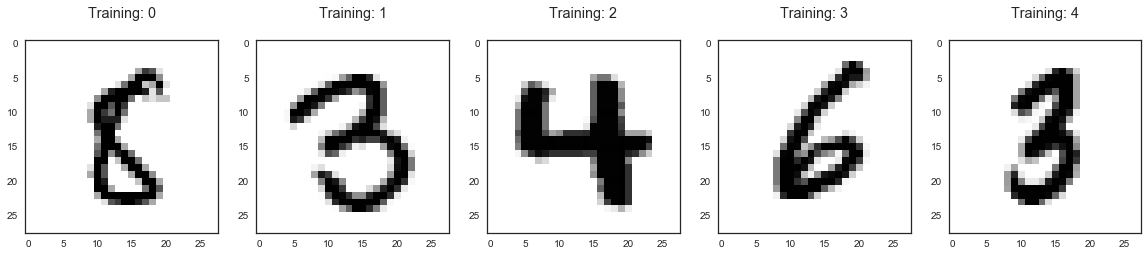

In [82]:
plt.figure(figsize=(20,4))

i = 0

sns.set_style("white")

for index, (image, label) in enumerate(zip(X_train[0:5], X_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray_r)
    plt.title('Training: {}\n'.format(i, fontsize = 20))
    i += 1

In [83]:
# Import the model (logReg)
from sklearn.linear_model import LogisticRegression

In [84]:
# Instantiate the model 
# default param. and solver = "lbfgs" (quicker than the default solver)
logReg = LogisticRegression(solver = "lbfgs")

In [85]:
# Train the model
logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [86]:
# Predict with the X_test
y_pred = logReg.predict(X_test)

In [87]:
# Compute the score of the model
score = logReg.score(X_test, y_test)
score

0.91323809523809529

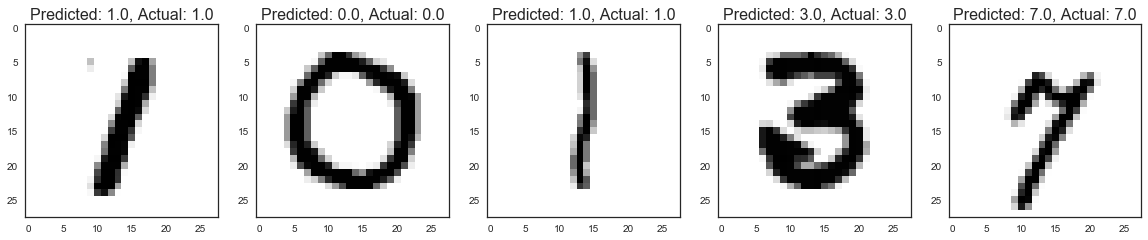

In [88]:
# Display Misclassified images and their label
index = 0
misclassIndex = []
for label, predict in zip(y_test, y_pred):
    if label != predict:
        misclassIndex.append(index)
        index += 1

plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassIndex[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (28,28)), cmap=plt.cm.gray_r)
    plt.title("Predicted: {}, Actual: {}".format(y_pred[badIndex], y_test[badIndex]), fontsize=16)